# TP - Support Vector Machines & Decision trees Part 1

## Génération de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

clusters_std = [1, 5]
#écart-type de 1
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=clusters_std[0], center_box=(-10.0, 10.0))

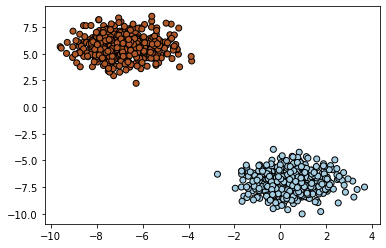

In [2]:
from sklearn import preprocessing
from sklearn import svm

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [3]:
#Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.00562542,  0.99554393],
       [-1.00609269,  1.02469278],
       [-0.40875493,  1.30823634],
       ...,
       [ 0.72649825, -0.90582929],
       [ 1.04843767, -1.06979962],
       [-1.12549181,  1.0830022 ]])

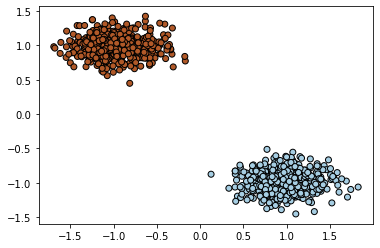

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

## SVM linéaire

### Données linéairement séparables

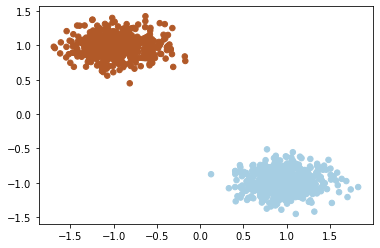

In [5]:
from sklearn import svm, metrics
from matplotlib import pyplot

#SVM à marge stricte (C=1000)
clf = svm.LinearSVC(C=1000)
clf.fit(X,y)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ypred = clf.predict(X_scaled)

In [6]:
#taux d’erreur
err_train = 1 - metrics.accuracy_score (ypred, y)
print("Train error: %.3f" % err_train)

Train error: 0.000


In [7]:
#matrice de confusion
metrics.confusion_matrix(y, ypred)

array([[500,   0],
       [  0, 500]], dtype=int64)

Nous avons aucune erreur, tous les exemples prédits sont dans leur réelle classe.

In [8]:
import numpy

# Création d'un mesh
h = .02 # Espacement du mesh
x_min, x_max = X_scaled[:, 0].min()*1.1, X_scaled[:, 0].max()*1.1
y_min, y_max = X_scaled[:, 1].min()*1.1, X_scaled[:, 1].max()*1.1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
numpy.arange(y_min, y_max, h))

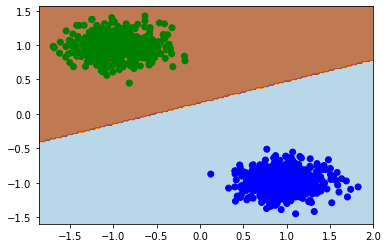

In [9]:
colors = numpy.array([x for x in "bgrcmyk"])
Y = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap=pyplot.cm.Paired, color=colors[y].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()

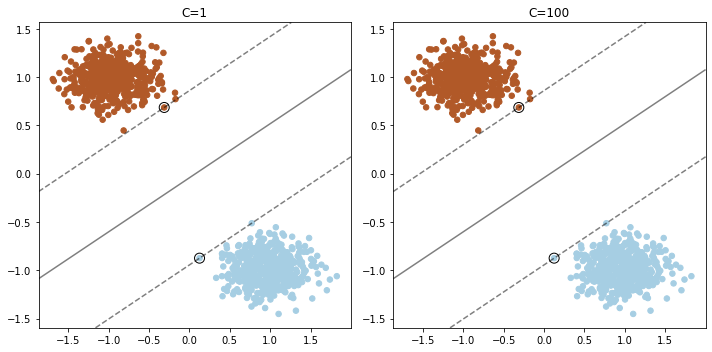

In [10]:
from sklearn.svm import LinearSVC
import numpy as np

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_scaled, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_scaled)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_scaled[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### Données non linéairement séparables

In [11]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=clusters_std[1], center_box=(-10.0, 10.0))

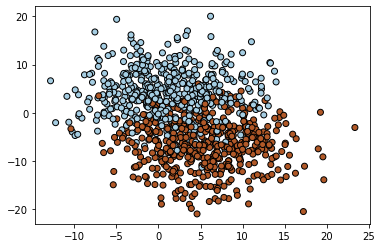

In [12]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [13]:
#Standardize data
scaler = StandardScaler()
X_scaled_bis = scaler.fit_transform(X)
X_scaled_bis

array([[ 0.03909644, -1.83797415],
       [ 1.21350866, -0.05402981],
       [-0.61520779, -0.04329917],
       ...,
       [ 0.98105298, -0.97655041],
       [-0.31564514, -1.46022281],
       [-0.9540021 ,  0.14145633]])

In [14]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

#validation croisée
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X_scaled_bis, y)

5

## SVM non linéaire à noyau gaussien

In [15]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(noise = 0.1, n_samples = 200, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
X_scaled = scaler.fit_transform(X)

In [17]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C = 1)

# Entraîner la SVM sur le jeu d'entraînement
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

Taux erreur en train :  0.0
Taux erreur en test :  0.0
Nombre de vecteurs supports :  19


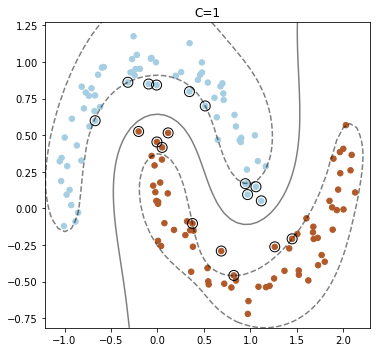

Taux erreur en train :  0.0
Taux erreur en test :  0.0
Nombre de vecteurs supports :  20


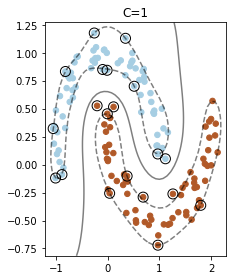

Taux erreur en train :  0.0
Taux erreur en test :  0.0
Nombre de vecteurs supports :  18


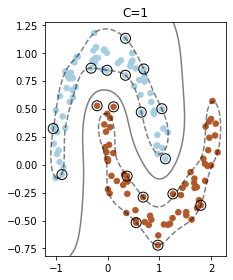

Taux erreur en train :  0.0
Taux erreur en test :  0.0
Nombre de vecteurs supports :  17


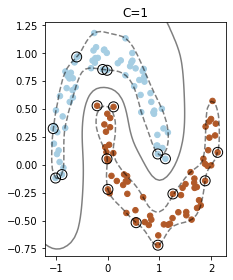

Taux erreur en train :  0.0
Taux erreur en test :  0.0
Nombre de vecteurs supports :  18


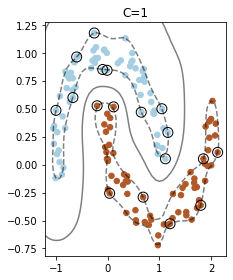

In [18]:
gamma = [2, 4, 6, 8, 10]

plt.figure(figsize=(10, 5))
for i, C in enumerate([1]):
    for j in gamma:
        clf = svm.SVC(C=C, gamma=j, kernel='rbf').fit(X_train, y_train)
        # obtain the support vectors through the decision function
        decision_function = clf.decision_function(X_train)
        # we can also calculate the decision function manually
        # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
        # The support vectors are the samples that lie within the margin
        # boundaries, whose size is conventionally constrained to 1
        support_vector_indices = np.where(
            np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')
        
        print("Taux erreur en train : ", 1 - clf.score(X_train, y_train))
        print("Taux erreur en test : ", 1 - clf.score(X_test, y_test))
        print("Nombre de vecteurs supports : ", len(support_vectors))
              
        plt.title("C=" + str(C))
        plt.tight_layout()
        plt.show()

In [19]:
X,y = make_moons(noise = 0.3, n_samples = 200, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C = 1)

# Entraîner la SVM sur le jeu d'entraînement
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  39


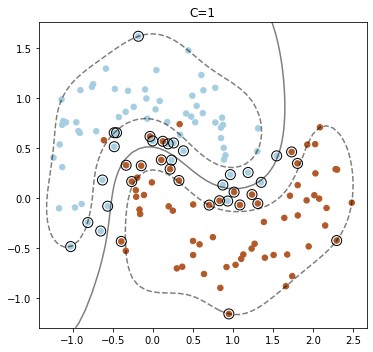

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  43


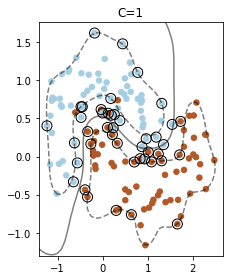

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  50


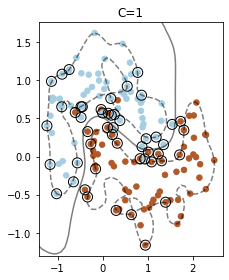

Taux erreur en train :  0.0357142857142857
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  50


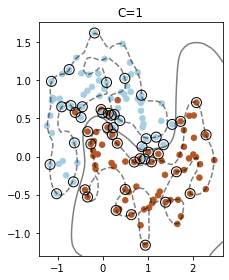

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  49


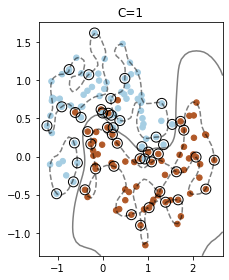

In [22]:
gamma = [2, 4, 6, 8, 10]
listVect = []

plt.figure(figsize=(10, 5))
for i, C in enumerate([1]):
    for j in gamma:
        clf = svm.SVC(C=C, gamma=j, kernel='rbf').fit(X_train, y_train)
        # obtain the support vectors through the decision function
        decision_function = clf.decision_function(X_train)
        # we can also calculate the decision function manually
        # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
        # The support vectors are the samples that lie within the margin
        # boundaries, whose size is conventionally constrained to 1
        support_vector_indices = np.where(
            np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')
        
        print("Taux erreur en train : ", 1 - clf.score(X_train, y_train))
        print("Taux erreur en test : ", 1 - clf.score(X_test, y_test))
        print("Nombre de vecteurs supports : ", len(support_vectors))
        listVect.append(len(support_vectors))
              
        plt.title("C=" + str(C))
        plt.tight_layout()
        plt.show()

In [23]:
import numpy as np
np.corrcoef(gamma, listVect)

array([[1.        , 0.85898443],
       [0.85898443, 1.        ]])

Taux erreur en train :  0.0714285714285714
Taux erreur en test :  0.06666666666666665
Nombre de vecteurs supports :  47
Matrice de confusion en train :  [[65  6]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 0 31]]


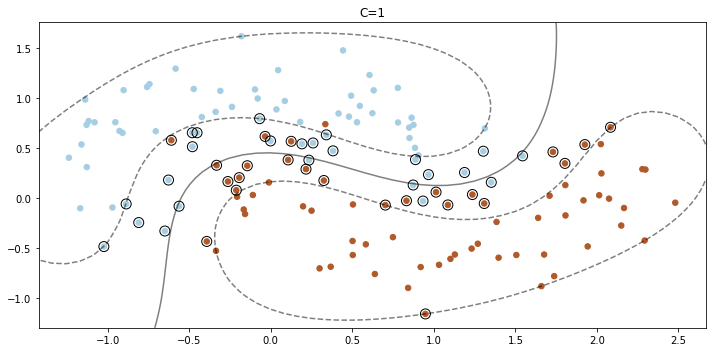

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  39
Matrice de confusion en train :  [[68  3]
 [ 4 65]]
Matrice de confusion en test :  [[24  5]
 [ 0 31]]


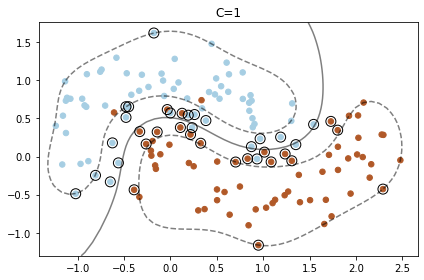

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  46
Matrice de confusion en train :  [[68  3]
 [ 4 65]]
Matrice de confusion en test :  [[24  5]
 [ 0 31]]


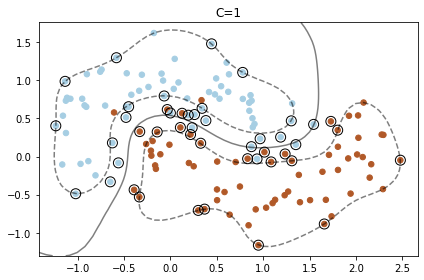

Taux erreur en train :  0.05714285714285716
Taux erreur en test :  0.1166666666666667
Nombre de vecteurs supports :  19
Matrice de confusion en train :  [[68  3]
 [ 5 64]]
Matrice de confusion en test :  [[24  5]
 [ 2 29]]


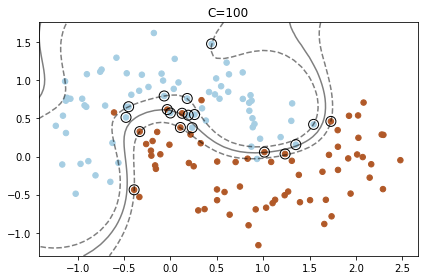

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[69  2]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


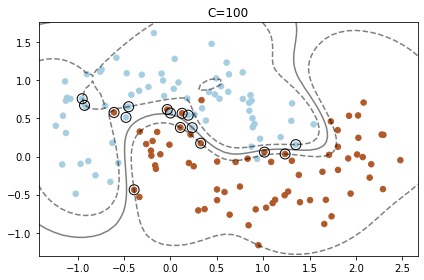

Taux erreur en train :  0.0357142857142857
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[70  1]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


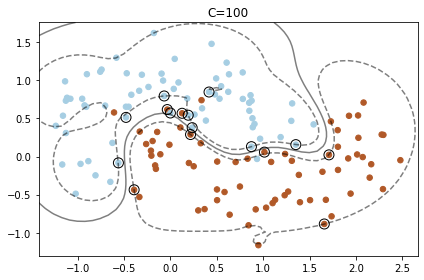

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  17
Matrice de confusion en train :  [[69  2]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


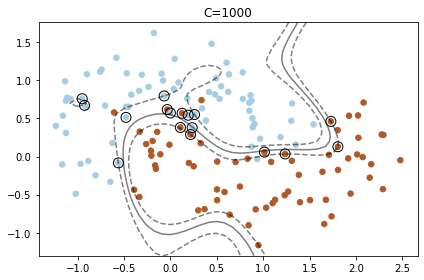

Taux erreur en train :  0.0357142857142857
Taux erreur en test :  0.18333333333333335
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[70  1]
 [ 4 65]]
Matrice de confusion en test :  [[23  6]
 [ 5 26]]


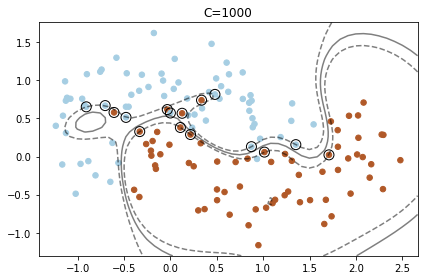

Taux erreur en train :  0.02857142857142858
Taux erreur en test :  0.23333333333333328
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[69  2]
 [ 2 67]]
Matrice de confusion en test :  [[21  8]
 [ 6 25]]


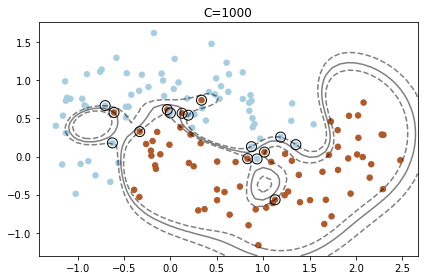

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

gamma = [1, 2, 3]
C_2d_range = [1, 100, 1000]
listVect = []
i = 0

plt.figure(figsize=(10, 5))
for C in C_2d_range:
    for j in gamma:
        clf = svm.SVC(C=C, gamma=j, kernel='rbf').fit(X_train, y_train)
        # obtain the support vectors through the decision function
        decision_function = clf.decision_function(X_train)
        # we can also calculate the decision function manually
        # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
        # The support vectors are the samples that lie within the margin
        # boundaries, whose size is conventionally constrained to 1
        support_vector_indices = np.where(
            np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')
        
        print("Taux erreur en train : ", 1 - clf.score(X_train, y_train))
        print("Taux erreur en test : ", 1 - clf.score(X_test, y_test))
        print("Nombre de vecteurs supports : ", len(support_vectors))
        listVect.append(len(support_vectors))
        
        ypred = clf.predict(X_train)
        print("Matrice de confusion en train : ", metrics.confusion_matrix(y_train, ypred))        
        ypred = clf.predict(X_test)
        print("Matrice de confusion en test : ", metrics.confusion_matrix(y_test, ypred))
              
        plt.title("C=" + str(C))
        plt.tight_layout()
        plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = clf.predict(X_train)
metrics.confusion_matrix(y_train, ypred)

array([[69,  2],
       [ 2, 67]], dtype=int64)

In [26]:
#validation croisée
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X_scaled, y)

5

Taux erreur en train :  0.0714285714285714
Taux erreur en test :  0.06666666666666665
Nombre de vecteurs supports :  47
Matrice de confusion en train :  [[65  6]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 0 31]]


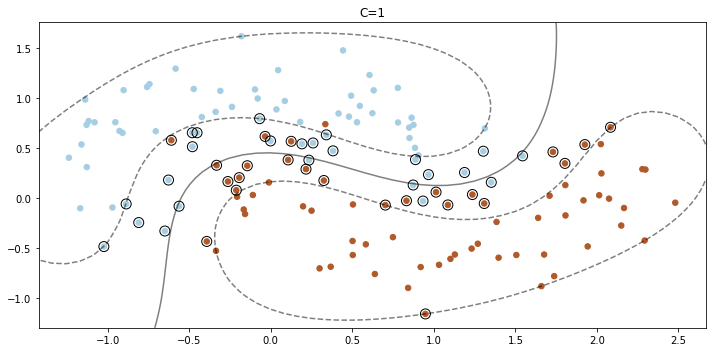

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  39
Matrice de confusion en train :  [[68  3]
 [ 4 65]]
Matrice de confusion en test :  [[24  5]
 [ 0 31]]


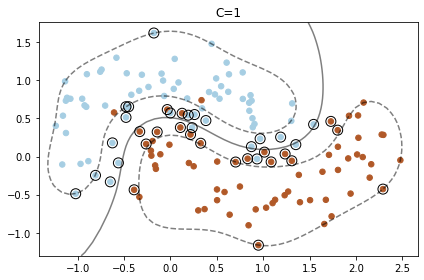

Taux erreur en train :  0.050000000000000044
Taux erreur en test :  0.08333333333333337
Nombre de vecteurs supports :  46
Matrice de confusion en train :  [[68  3]
 [ 4 65]]
Matrice de confusion en test :  [[24  5]
 [ 0 31]]


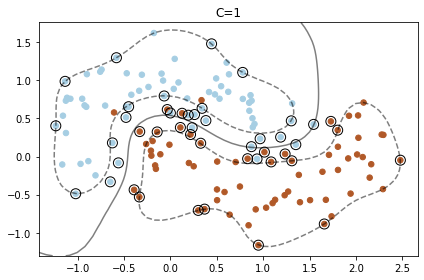

Taux erreur en train :  0.05714285714285716
Taux erreur en test :  0.1166666666666667
Nombre de vecteurs supports :  19
Matrice de confusion en train :  [[68  3]
 [ 5 64]]
Matrice de confusion en test :  [[24  5]
 [ 2 29]]


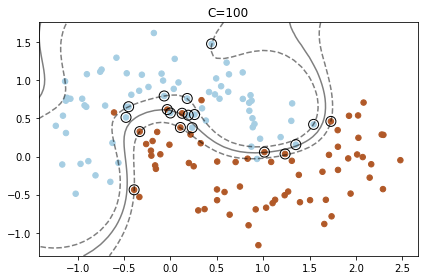

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[69  2]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


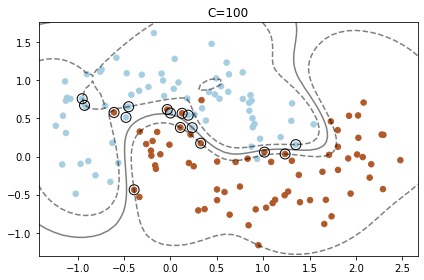

Taux erreur en train :  0.0357142857142857
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[70  1]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


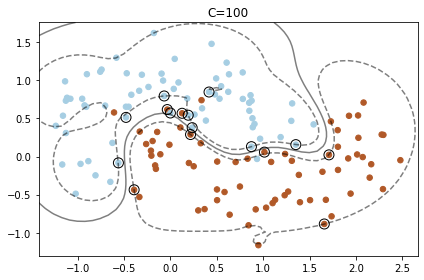

Taux erreur en train :  0.042857142857142816
Taux erreur en test :  0.1333333333333333
Nombre de vecteurs supports :  17
Matrice de confusion en train :  [[69  2]
 [ 4 65]]
Matrice de confusion en test :  [[25  4]
 [ 4 27]]


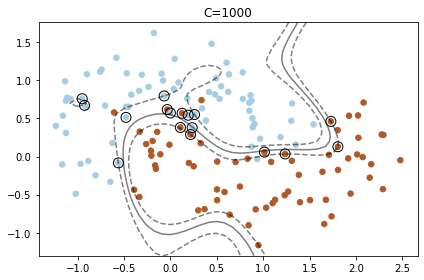

Taux erreur en train :  0.0357142857142857
Taux erreur en test :  0.18333333333333335
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[70  1]
 [ 4 65]]
Matrice de confusion en test :  [[23  6]
 [ 5 26]]


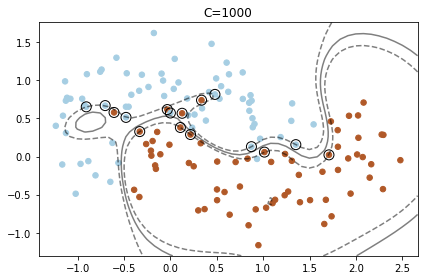

Taux erreur en train :  0.02857142857142858
Taux erreur en test :  0.23333333333333328
Nombre de vecteurs supports :  16
Matrice de confusion en train :  [[69  2]
 [ 2 67]]
Matrice de confusion en test :  [[21  8]
 [ 6 25]]


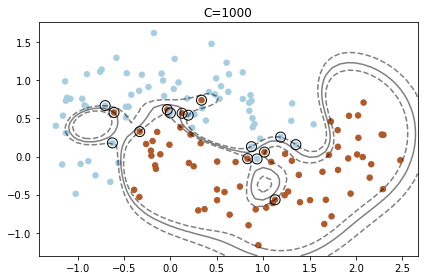

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

gamma = [1, 2, 3]
C_2d_range = [1, 100, 1000]
listVect = []
i = 0

plt.figure(figsize=(10, 5))
for C in C_2d_range:
    for j in gamma:
        clf = svm.SVC(C=C, gamma=j, kernel='rbf').fit(X_train, y_train)
        # obtain the support vectors through the decision function
        decision_function = clf.decision_function(X_train)
        # we can also calculate the decision function manually
        # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
        # The support vectors are the samples that lie within the margin
        # boundaries, whose size is conventionally constrained to 1
        support_vector_indices = np.where(
            np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')
        
        print("Taux erreur en train : ", 1 - clf.score(X_train, y_train))
        print("Taux erreur en test : ", 1 - clf.score(X_test, y_test))
        print("Nombre de vecteurs supports : ", len(support_vectors))
        listVect.append(len(support_vectors))
        
        ypred = clf.predict(X_train)
        print("Matrice de confusion en train : ", metrics.confusion_matrix(y_train, ypred))        
        ypred = clf.predict(X_test)
        print("Matrice de confusion en test : ", metrics.confusion_matrix(y_test, ypred))
              
        plt.title("C=" + str(C))
        plt.tight_layout()
        plt.show()

In [28]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#validation croisée
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X_scaled, y)

5

In [29]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_scaled, y)

[Text(167.4, 163.07999999999998, 'X[0] <= -0.355\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.813\nsamples = 59\nvalue = [47, 11, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.167\nsamples = 91\nvalue = [3, 39, 49]')]

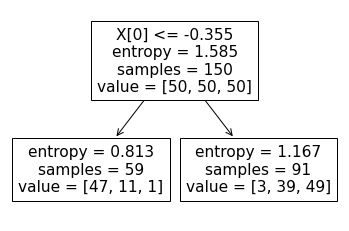

In [35]:
depth_max = [1, 2, 3, 4]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_max[0])
clf = clf.fit(X_scaled, y)
tree.plot_tree(clf) 

[Text(167.4, 181.2, 'X[0] <= -0.355\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 108.72, 'X[1] <= -0.592\nentropy = 0.813\nsamples = 59\nvalue = [47, 11, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.817\nsamples = 12\nvalue = [1, 10, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.149\nsamples = 47\nvalue = [46, 1, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 1.479\nentropy = 1.167\nsamples = 91\nvalue = [3, 39, 49]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.994\nsamples = 86\nvalue = [0, 39, 47]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]')]

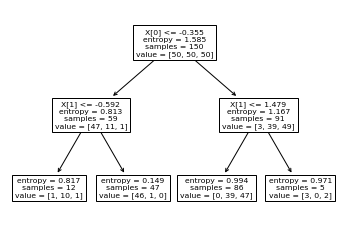

In [36]:
depth_max = [1, 2, 3, 4]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_max[1])
clf = clf.fit(X_scaled, y)
clf.score(y)
tree.plot_tree(clf)

[Text(167.4, 190.26, 'X[0] <= -0.355\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'X[1] <= -0.592\nentropy = 0.813\nsamples = 59\nvalue = [47, 11, 1]'),
 Text(41.85, 81.53999999999999, 'X[0] <= -1.082\nentropy = 0.817\nsamples = 12\nvalue = [1, 10, 1]'),
 Text(20.925, 27.180000000000007, 'entropy = 1.585\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= -0.598\nentropy = 0.149\nsamples = 47\nvalue = [46, 1, 0]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.544\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 1.479\nentropy = 1.167\nsamples = 91\nvalue = [3, 39, 49]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 0.493\nentropy = 0.994\nsamples = 86\nvalue = [0, 39, 47]'),
 Text(188.32500000000002, 27.18000000

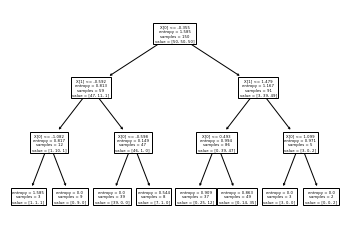

In [37]:
depth_max = [1, 2, 3, 4]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_max[2])
clf = clf.fit(X_scaled, y)
tree.plot_tree(clf)